<a href="https://colab.research.google.com/github/linlills/NeuralNetworks/blob/main/Vdovina_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import numpy.random as rand
import random
from random import randint

# генерация случайного цвета
colors = []
for i in range(500):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

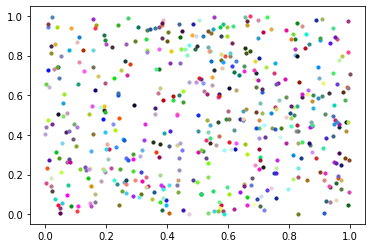

In [ ]:
x_train = np.random.sample((500, 2)) # координаты точек
# print(x_train)

for i in range(500):
  color = colors[i]
  plt.scatter(x_train[i,0], x_train[i,1], color = color, s=10)
plt.show()

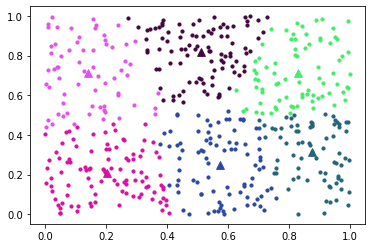

In [ ]:
class K_Means:
    def __init__(self, k=6, tol=0.0000001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid) > self.tol:
                   # print(np.sum((current_centroid-original_centroid)/original_centroid))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

clf = K_Means()
clf.fit(x_train)

for centroid in clf.centroids:
  color = colors[centroid]
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker = "^", color = color, s = 60)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], color=color, s=10)
        
plt.show()